In [1]:
import sys
#sys.executable

In [3]:
import numpy as np

In [4]:
from libsvm.svmutil import *

In [5]:
import matplotlib.pylab as plt
import numpy as np

In [6]:
import torch.nn as nn
import torch.nn.functional as F


In [7]:
from torch.autograd import Function
import math


In [8]:
from qubovert import *

In [9]:
from qubovert.sim import anneal_pubo

In [10]:
import sys
import struct
import networkx as nx
import dwave_networkx as dnx
import matplotlib.pyplot as plt
import numpy as np
import dimod
import collections
import math
import pickle
import json
from dwave.system import DWaveSampler, EmbeddingComposite, FixedEmbeddingComposite
from dwave.cloud import Client
from dwave.system import DWaveSampler
from dwave.embedding import EmbeddedStructure
import dwave.inspector
import dwave.embedding
from minorminer import find_embedding



In [20]:
import networkx as nx
import dwave_networkx as dnx

P16 = dnx.pegasus_graph(16)          ## Advantage
C = dnx.chimera_graph(16, 16, 4)     ## 2000Q

In [12]:
client = Client.from_config(token='')

In [13]:
solvers = client.get_solvers(num_qubits__gt=3000)
solvers

[StructuredSolver(id='Advantage_system1.1')]

In [194]:
solver = solvers[0]
solver

StructuredSolver(id='Advantage_system1.1')

In [206]:
solver.edges

{(1185, 3171),
 (1055, 3890),
 (1611, 4133),
 (3520, 1998),
 (5137, 1437),
 (4227, 2197),
 (1834, 3759),
 (5188, 2636),
 (5333, 1573),
 (3965, 1145),
 (422, 421),
 (1505, 3967),
 (5079, 1721),
 (2089, 3821),
 (5252, 477),
 (2637, 2636),
 (3797, 3796),
 (3883, 2434),
 (2494, 3703),
 (3485, 1098),
 (5050, 5065),
 (5304, 1752),
 (4371, 1283),
 (4442, 593),
 (2143, 5396),
 (1025, 3965),
 (2667, 5234),
 (3422, 467),
 (2113, 5441),
 (1291, 3142),
 (3503, 1562),
 (3267, 3266),
 (3062, 450),
 (4925, 4924),
 (1192, 4386),
 (4582, 1373),
 (2106, 4090),
 (4386, 1192),
 (4741, 370),
 (4051, 366),
 (1971, 4165),
 (3505, 1922),
 (4753, 2424),
 (2041, 3220),
 (5388, 5387),
 (3525, 123),
 (1591, 1592),
 (2546, 4948),
 (2472, 5263),
 (4957, 1360),
 (834, 4774),
 (243, 3676),
 (3910, 1970),
 (2612, 2627),
 (4162, 1446),
 (5414, 2758),
 (5045, 1121),
 (1892, 3505),
 (4825, 1990),
 (3845, 1069),
 (4097, 561),
 (2423, 4527),
 (4813, 2589),
 (1381, 3201),
 (4004, 2690),
 (2483, 4513),
 (893, 4474),
 (5647, 

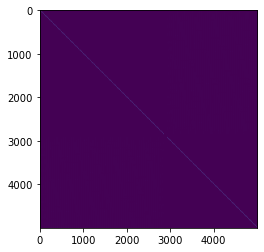

In [208]:
A = np.zeros((5000,5000))
solver_edges = solver.edges
for i in range(5000):
    for j in range(5000):
        if (i,j) in solver_edges:
            A[i,j] = 1.

plt.figure()
plt.imshow(A)

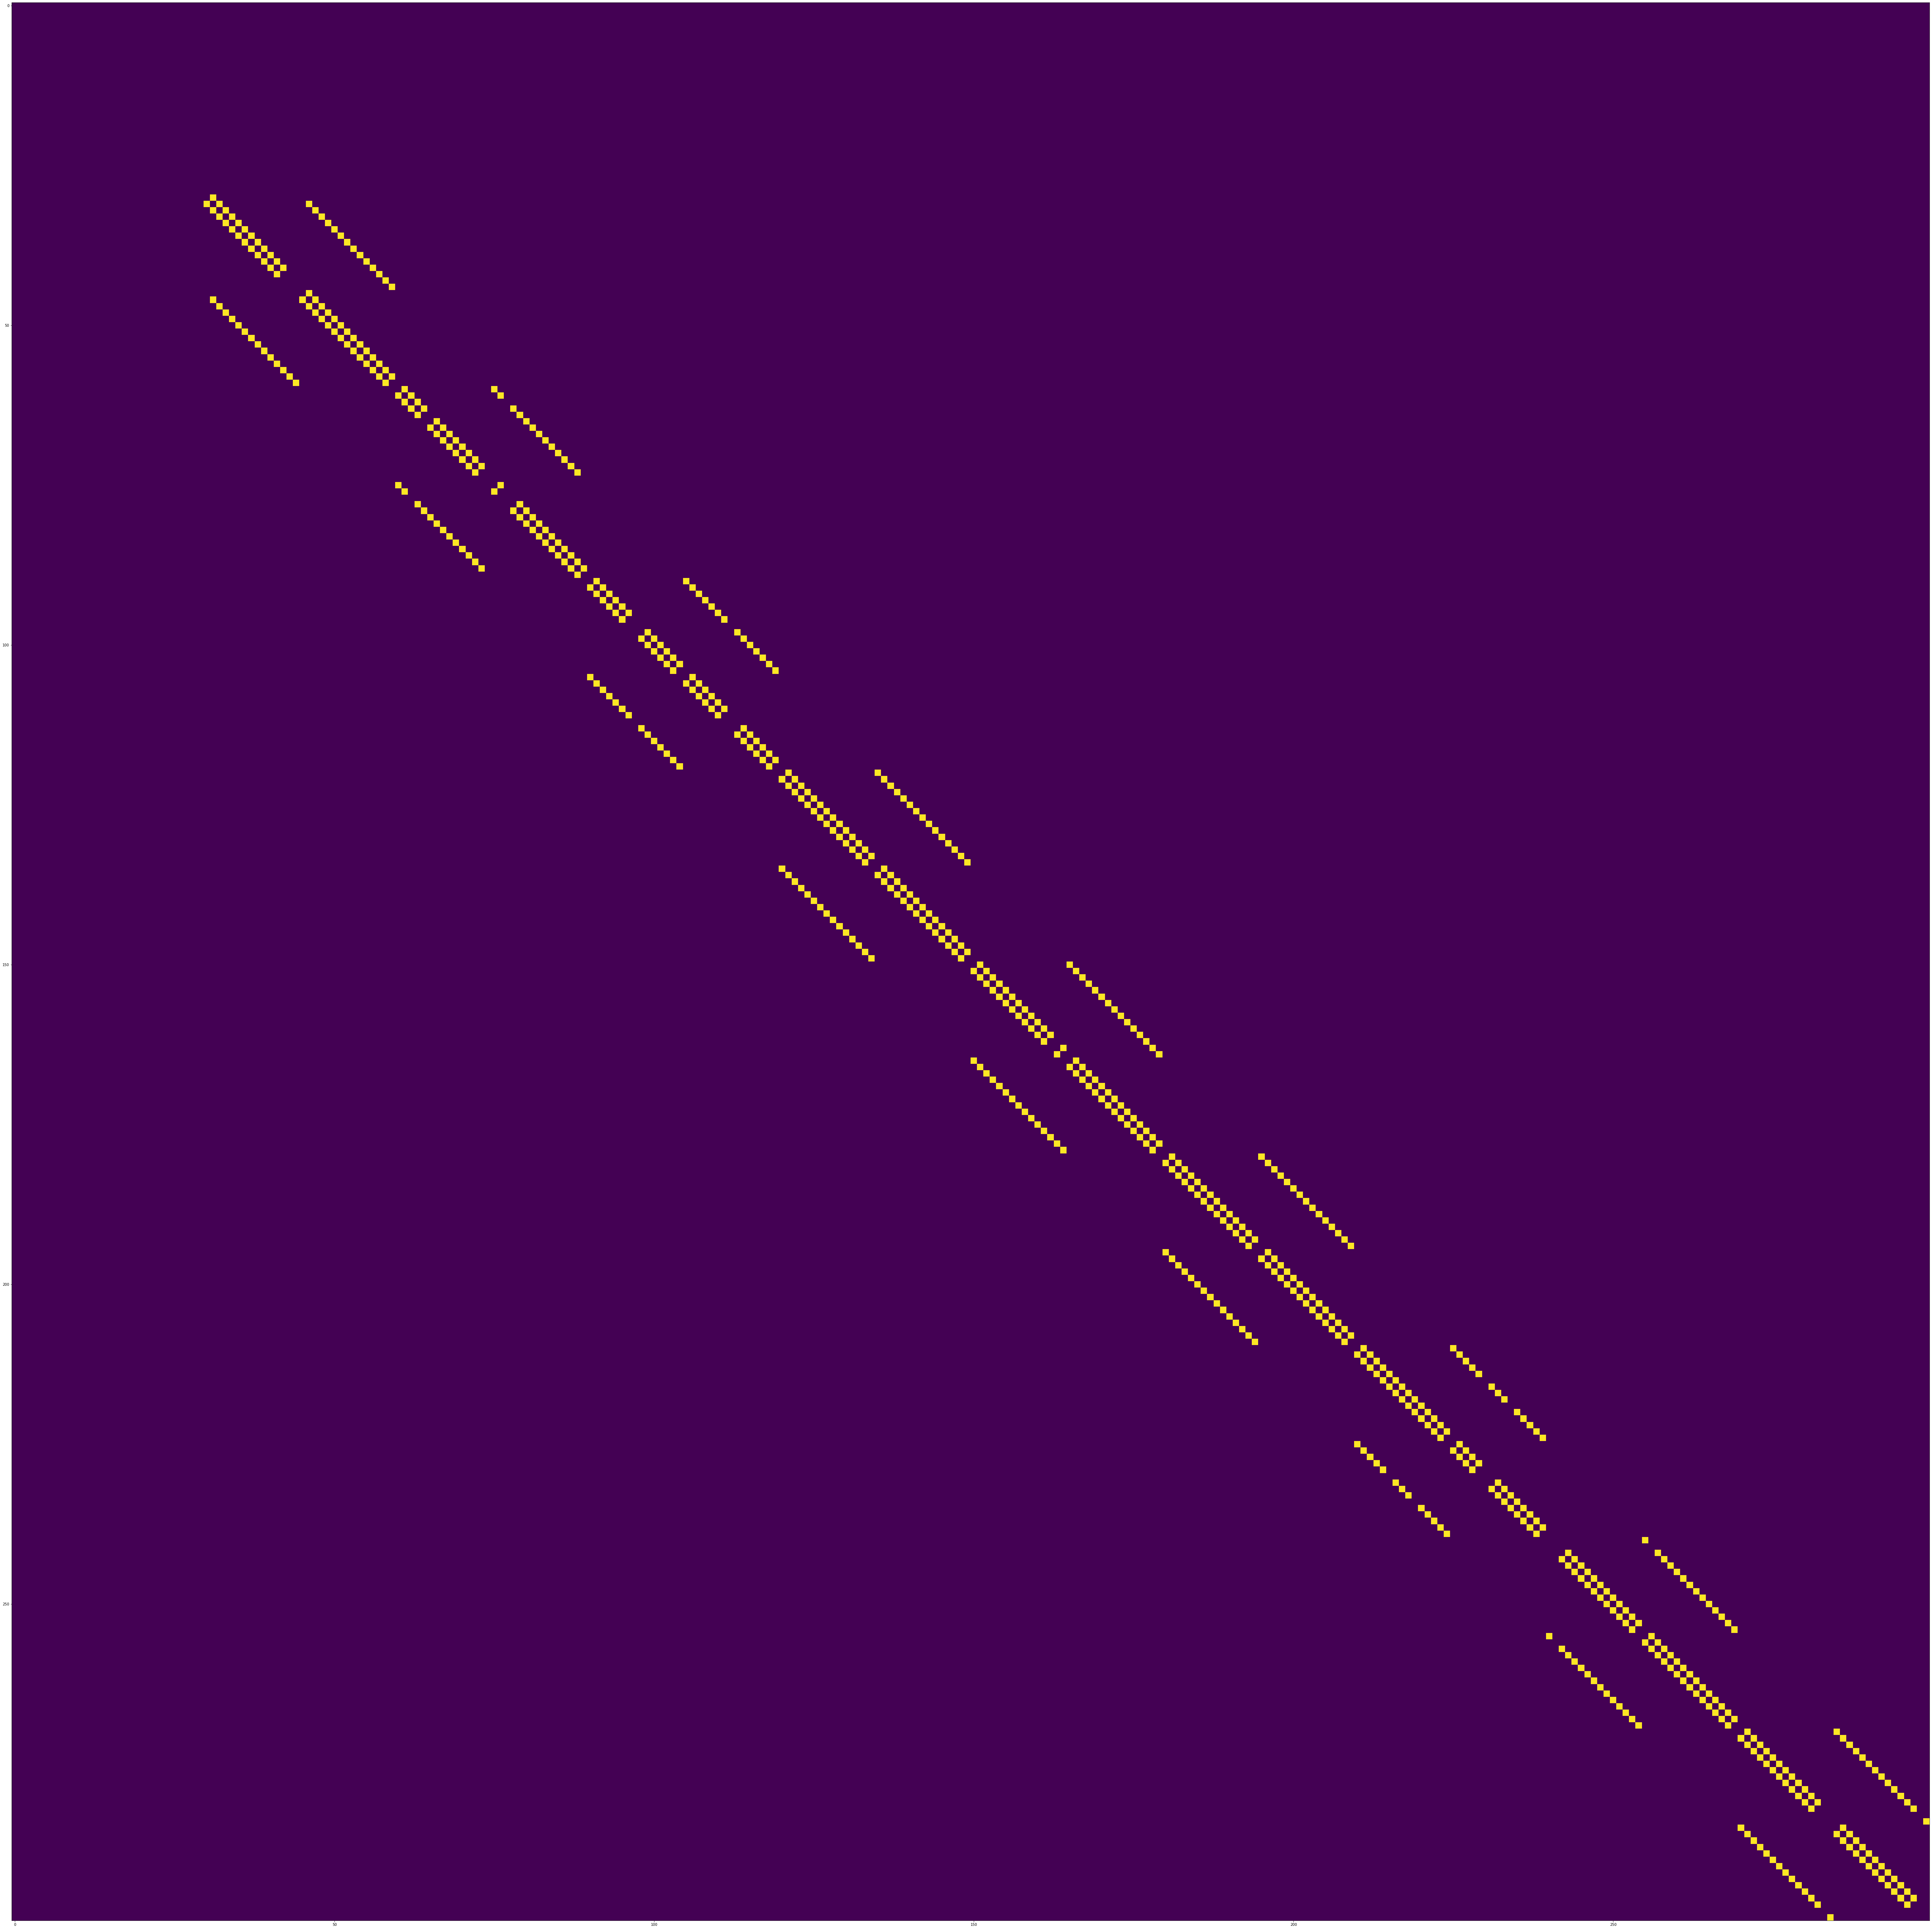

In [212]:
plt.figure(figsize=(100,100))
plt.imshow(A[:300,:300])

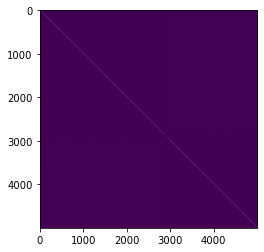

In [215]:
A = np.zeros((5000,5000))
P16_edges = P16.edges
for i in range(5000):
    for j in range(5000):
        if (i,j) in P16_edges:
            A[i,j] = 1.

plt.figure()
plt.imshow(A)


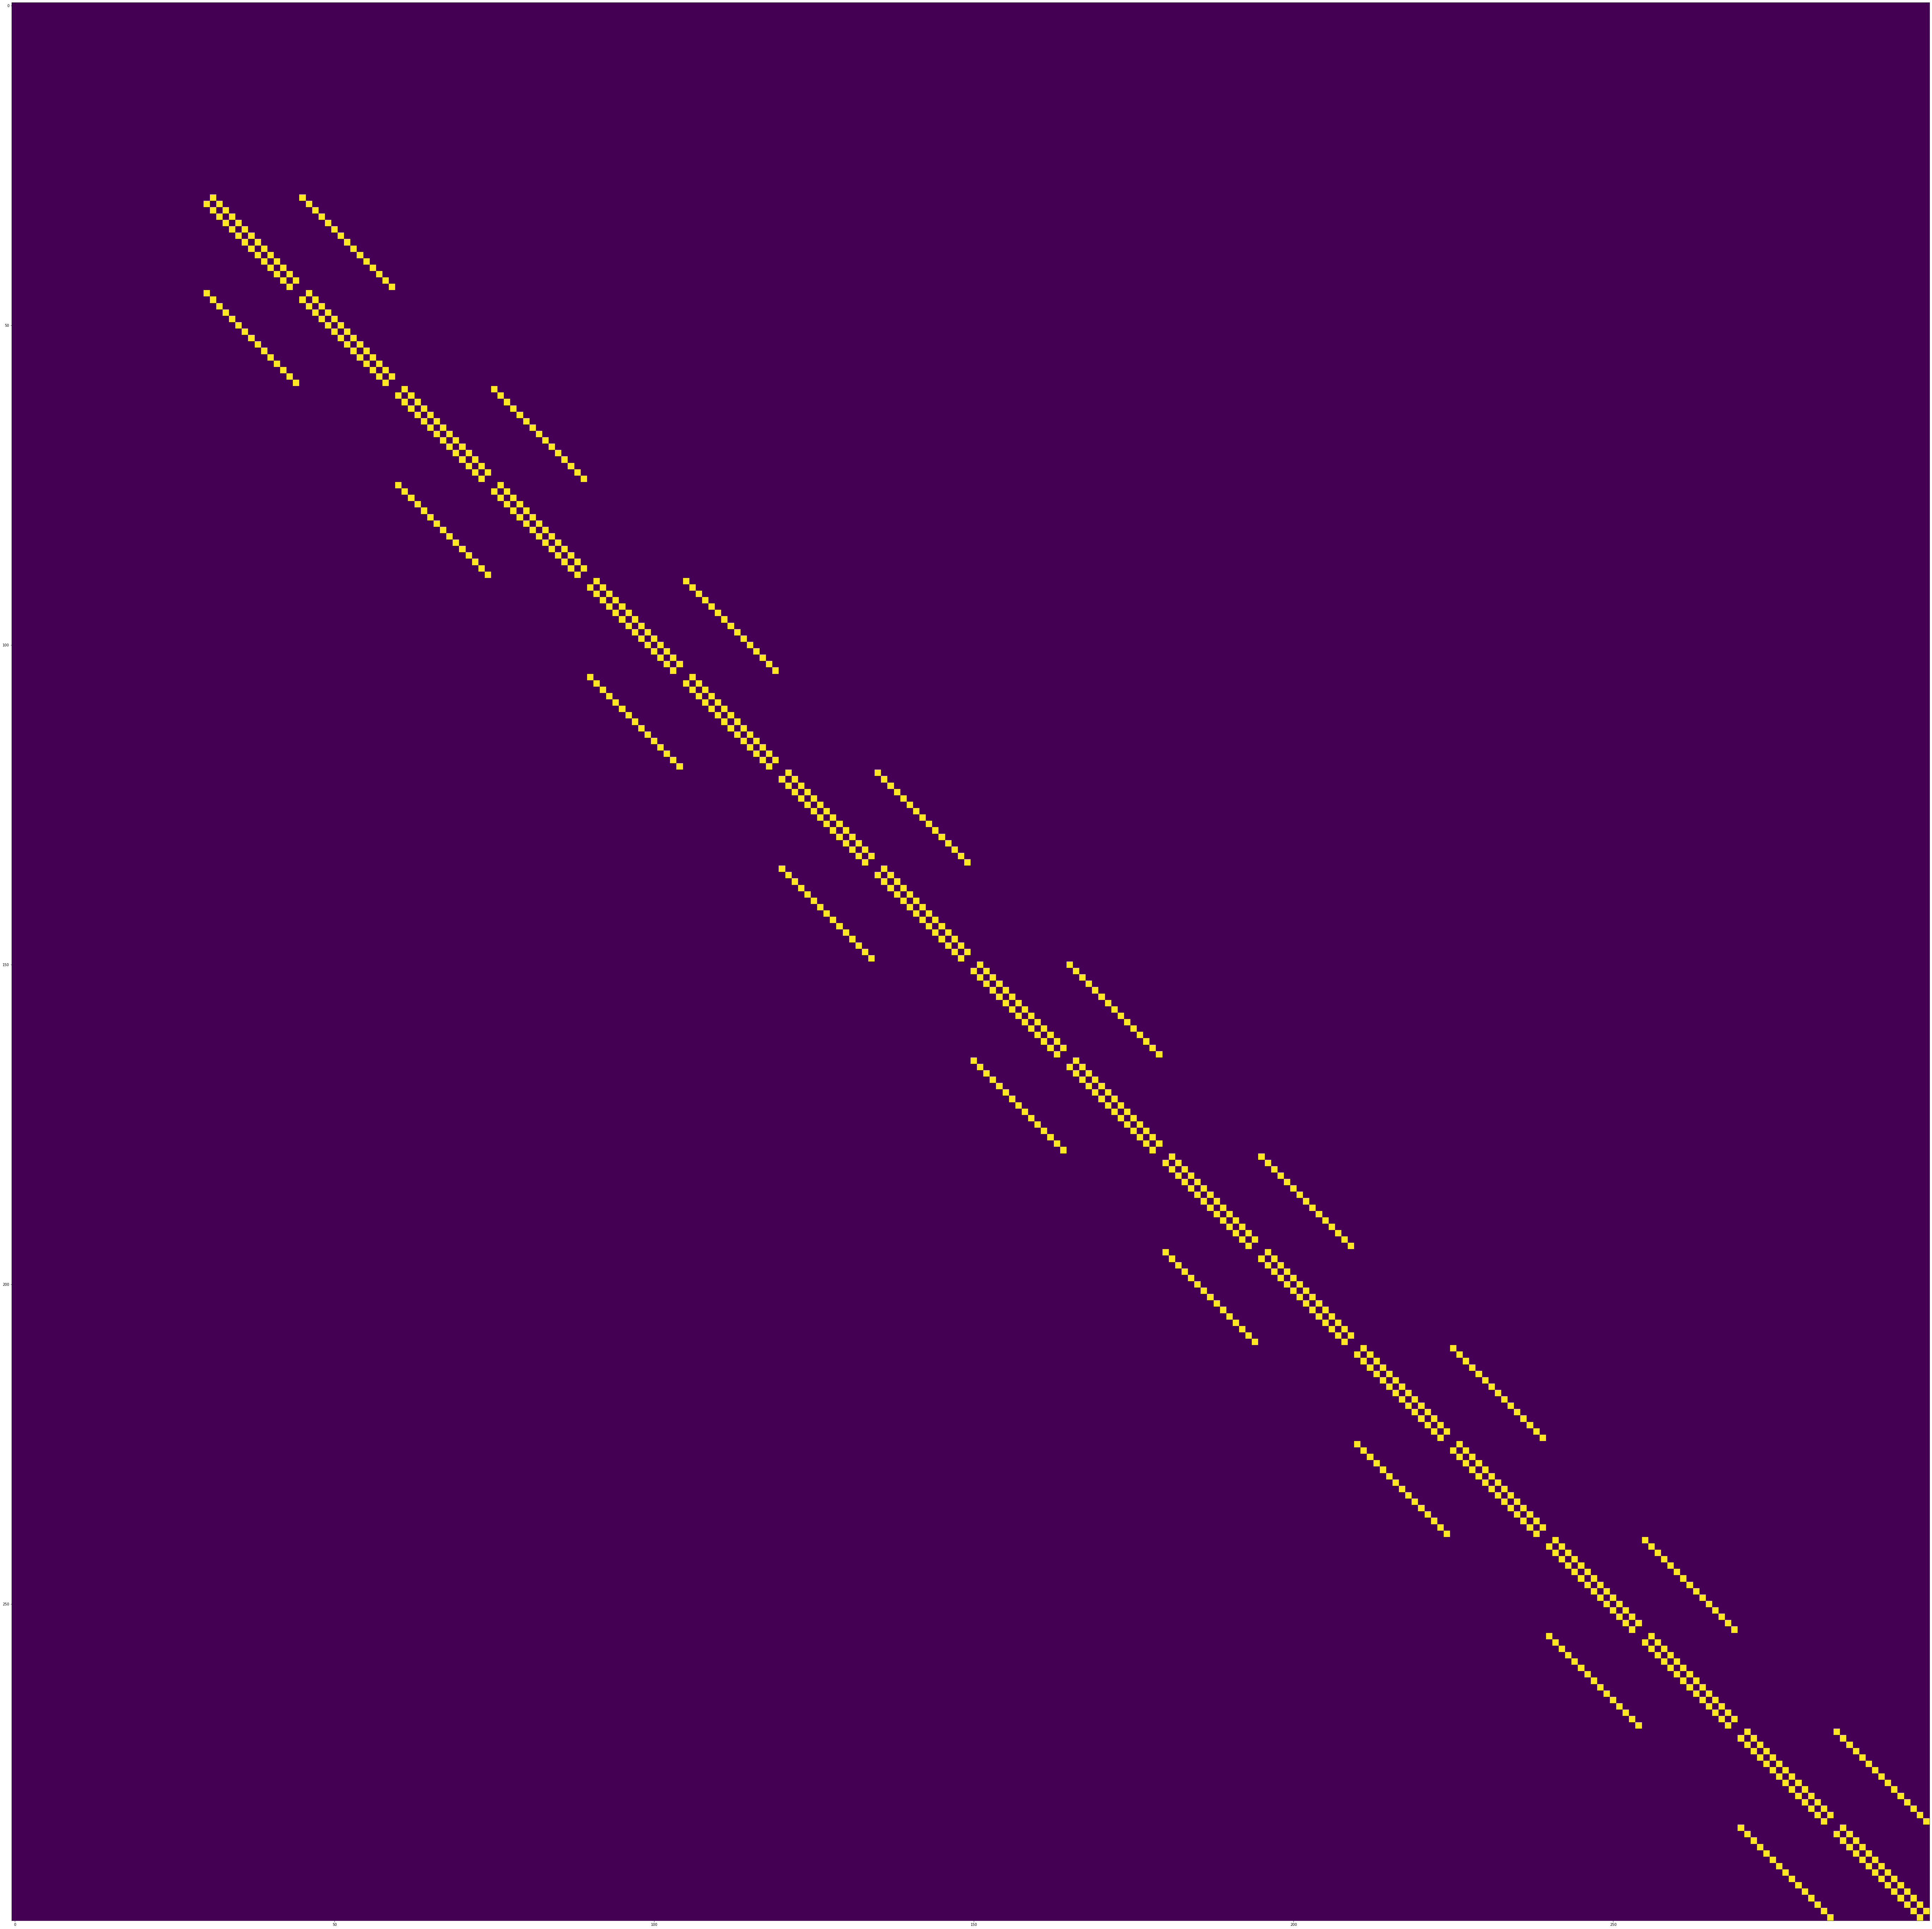

In [216]:
plt.figure(figsize=(100,100))
plt.imshow(A[:300,:300])

In [218]:
G = nx.Graph()
G.add_edges_from( solver.edges )

In [14]:
solvers = client.get_solvers(num_qubits__lt=3000)
solvers

[StructuredSolver(id='DW_2000Q_6')]

In [15]:
solver = solvers[0]
solver

StructuredSolver(id='DW_2000Q_6')

In [16]:
solver.edges

{(711, 707),
 (1634, 1638),
 (416, 288),
 (587, 590),
 (1099, 1102),
 (877, 872),
 (1389, 1384),
 (642, 645),
 (1820, 1818),
 (260, 256),
 (1388, 1396),
 (601, 606),
 (1113, 1118),
 (963, 835),
 (855, 849),
 (497, 501),
 (1551, 1547),
 (1950, 1945),
 (1538, 1666),
 (1724, 1721),
 (1426, 1428),
 (1118, 1112),
 (1107, 1109),
 (1197, 1195),
 (1397, 1395),
 (1790, 1786),
 (506, 508),
 (1505, 1510),
 (99, 103),
 (388, 386),
 (1660, 1658),
 (619, 620),
 (1131, 1132),
 (1949, 1945),
 (1083, 1085),
 (653, 650),
 (1165, 1162),
 (697, 702),
 (1913, 1918),
 (1159, 1152),
 (1613, 1605),
 (1391, 1387),
 (1544, 1672),
 (2037, 2033),
 (500, 496),
 (840, 845),
 (350, 342),
 (1196, 1193),
 (1799, 1794),
 (594, 599),
 (1054, 1051),
 (1528, 1533),
 (490, 492),
 (383, 379),
 (1763, 1764),
 (1409, 1537),
 (1579, 1581),
 (1869, 1867),
 (590, 586),
 (681, 686),
 (1102, 1098),
 (49, 52),
 (349, 345),
 (1509, 1505),
 (120, 127),
 (484, 480),
 (1135, 1143),
 (1443, 1571),
 (1030, 1025),
 (777, 649),
 (1289, 116

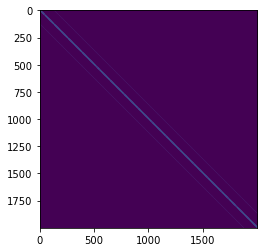

In [17]:
A = np.zeros((2000,2000))
solver_edges = solver.edges
for i in range(2000):
    for j in range(2000):
        if (i,j) in solver_edges:
            A[i,j] = 1.

plt.figure()
plt.imshow(A)

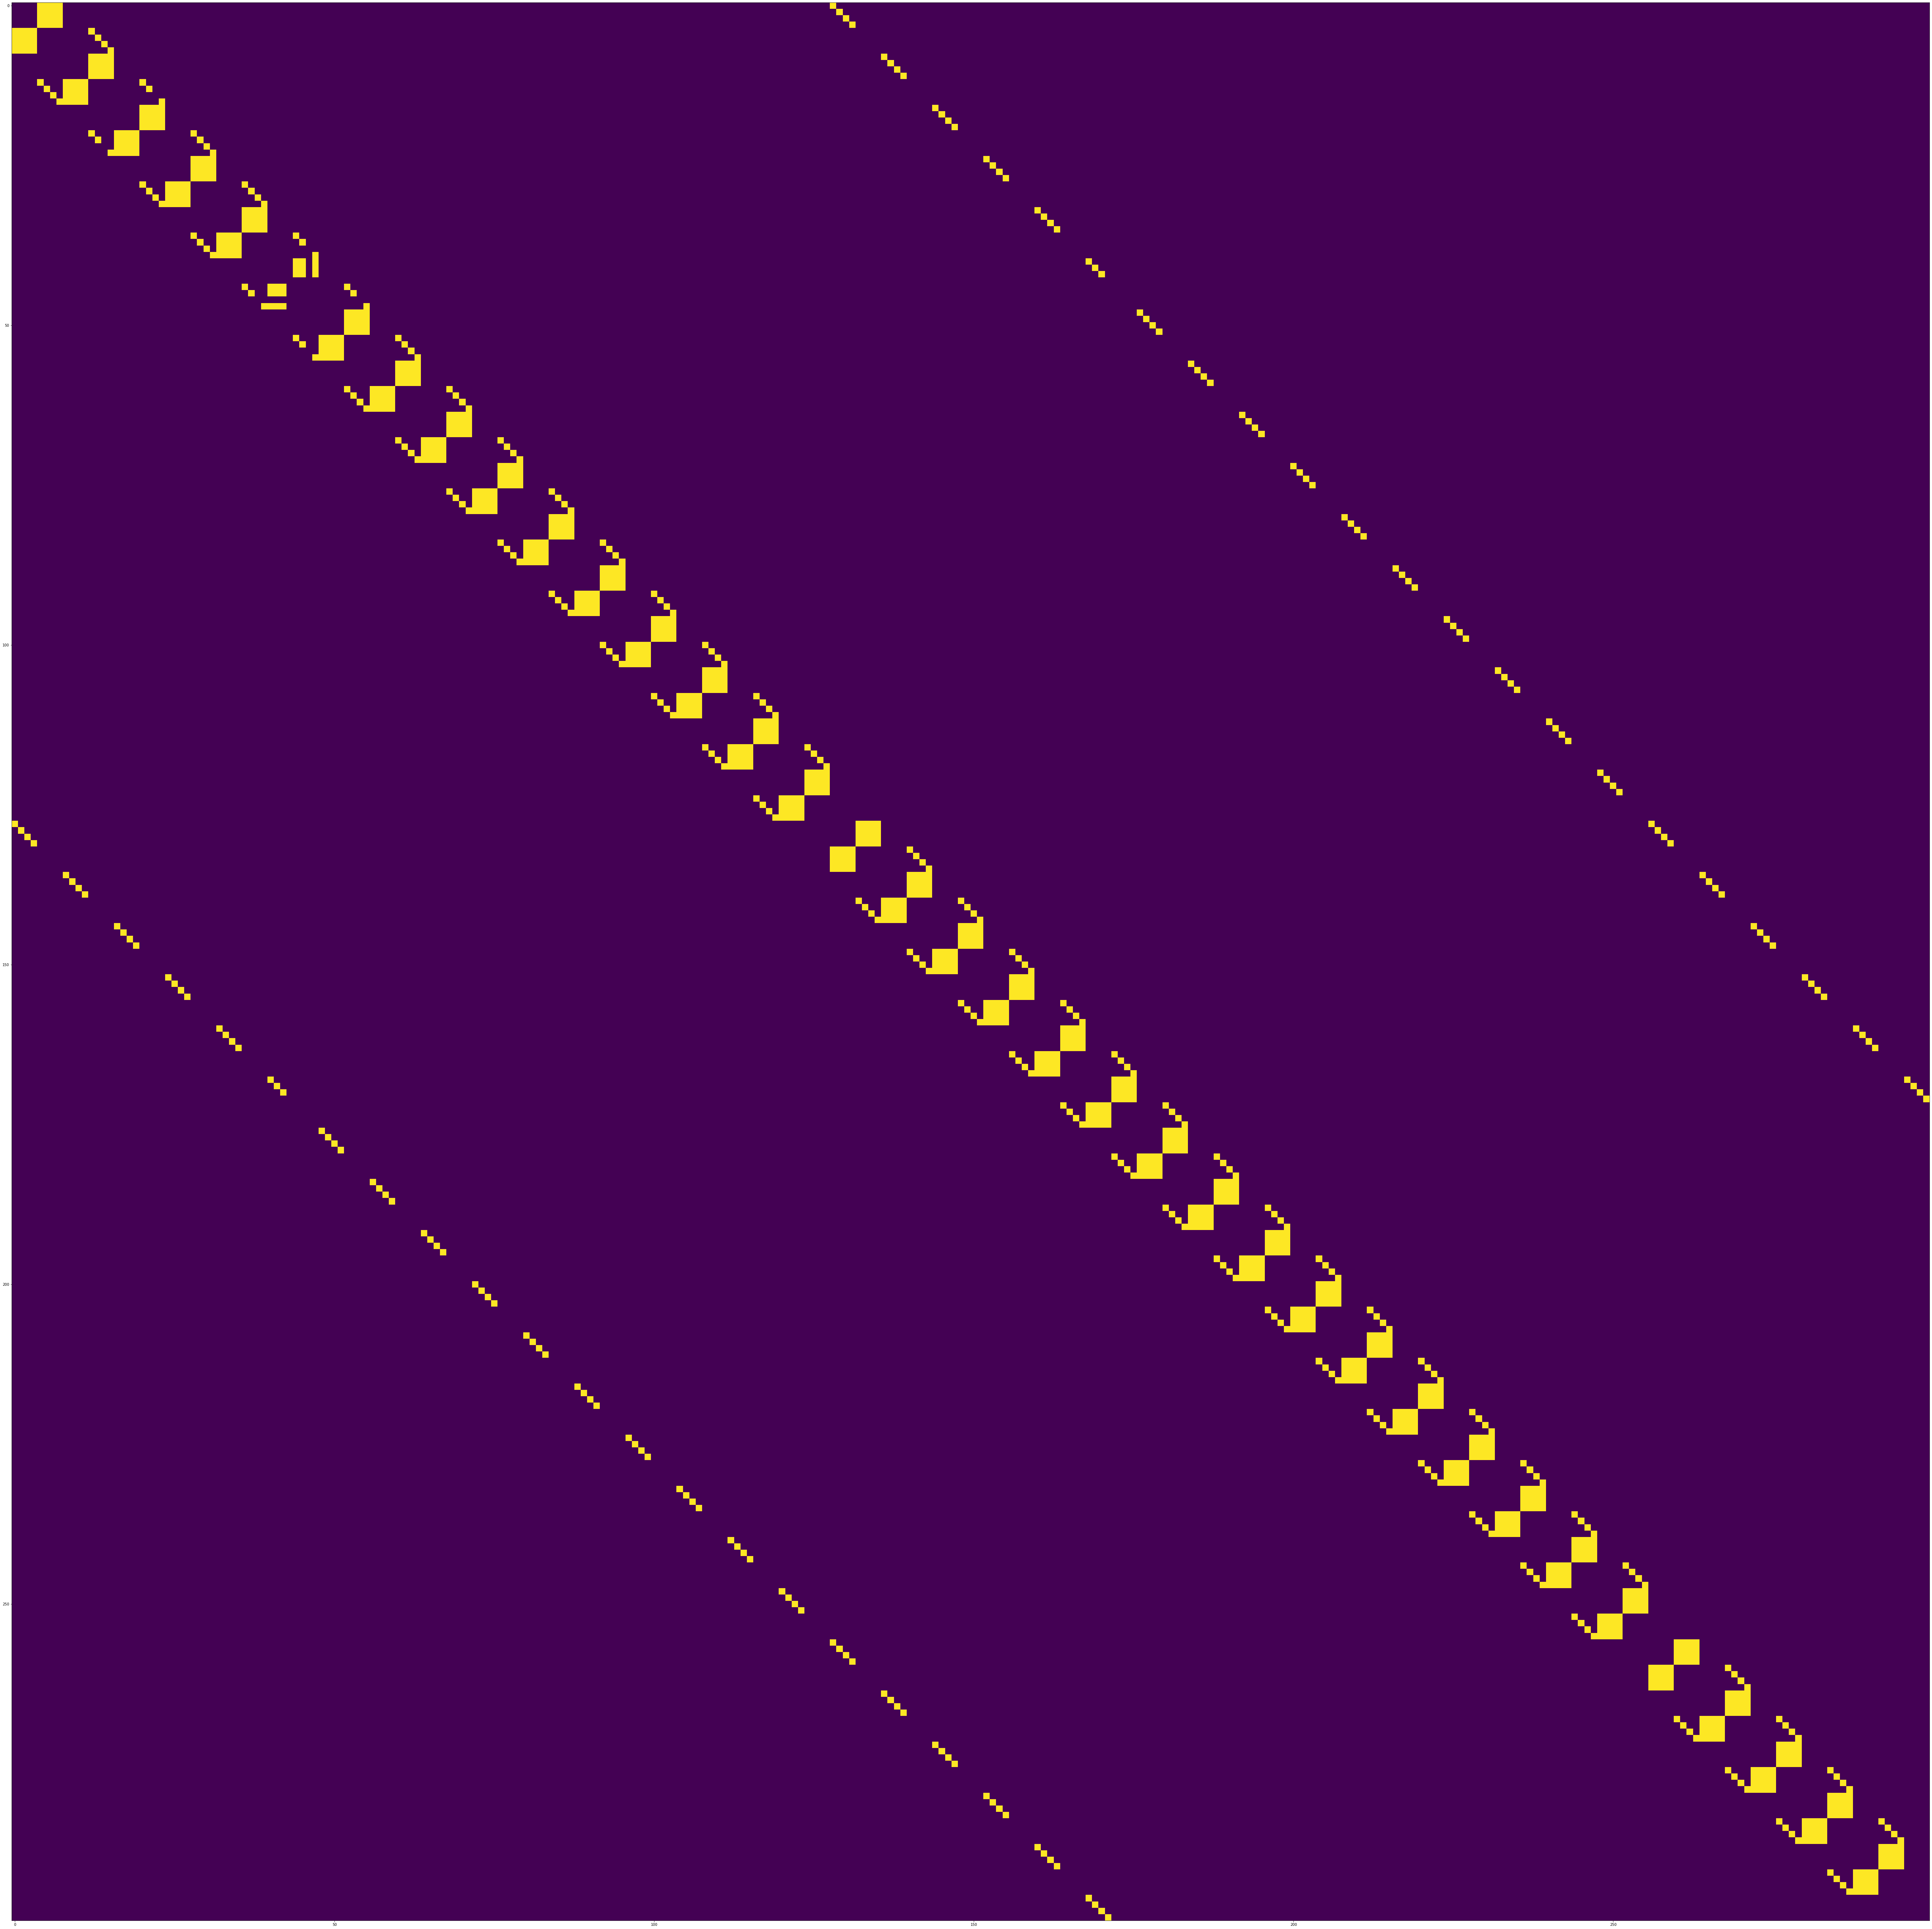

In [18]:
plt.figure(figsize=(100,100))
plt.imshow(A[:300,:300])

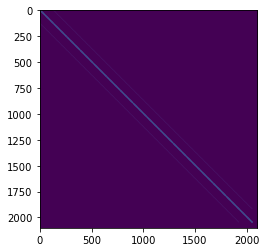

In [27]:
A = np.zeros((2100,2100))
C_edges = C.edges
for i in range(2100):
    for j in range(2100):
        if (i,j) in C_edges:
            A[i,j] = 1.

plt.figure()
plt.imshow(A)


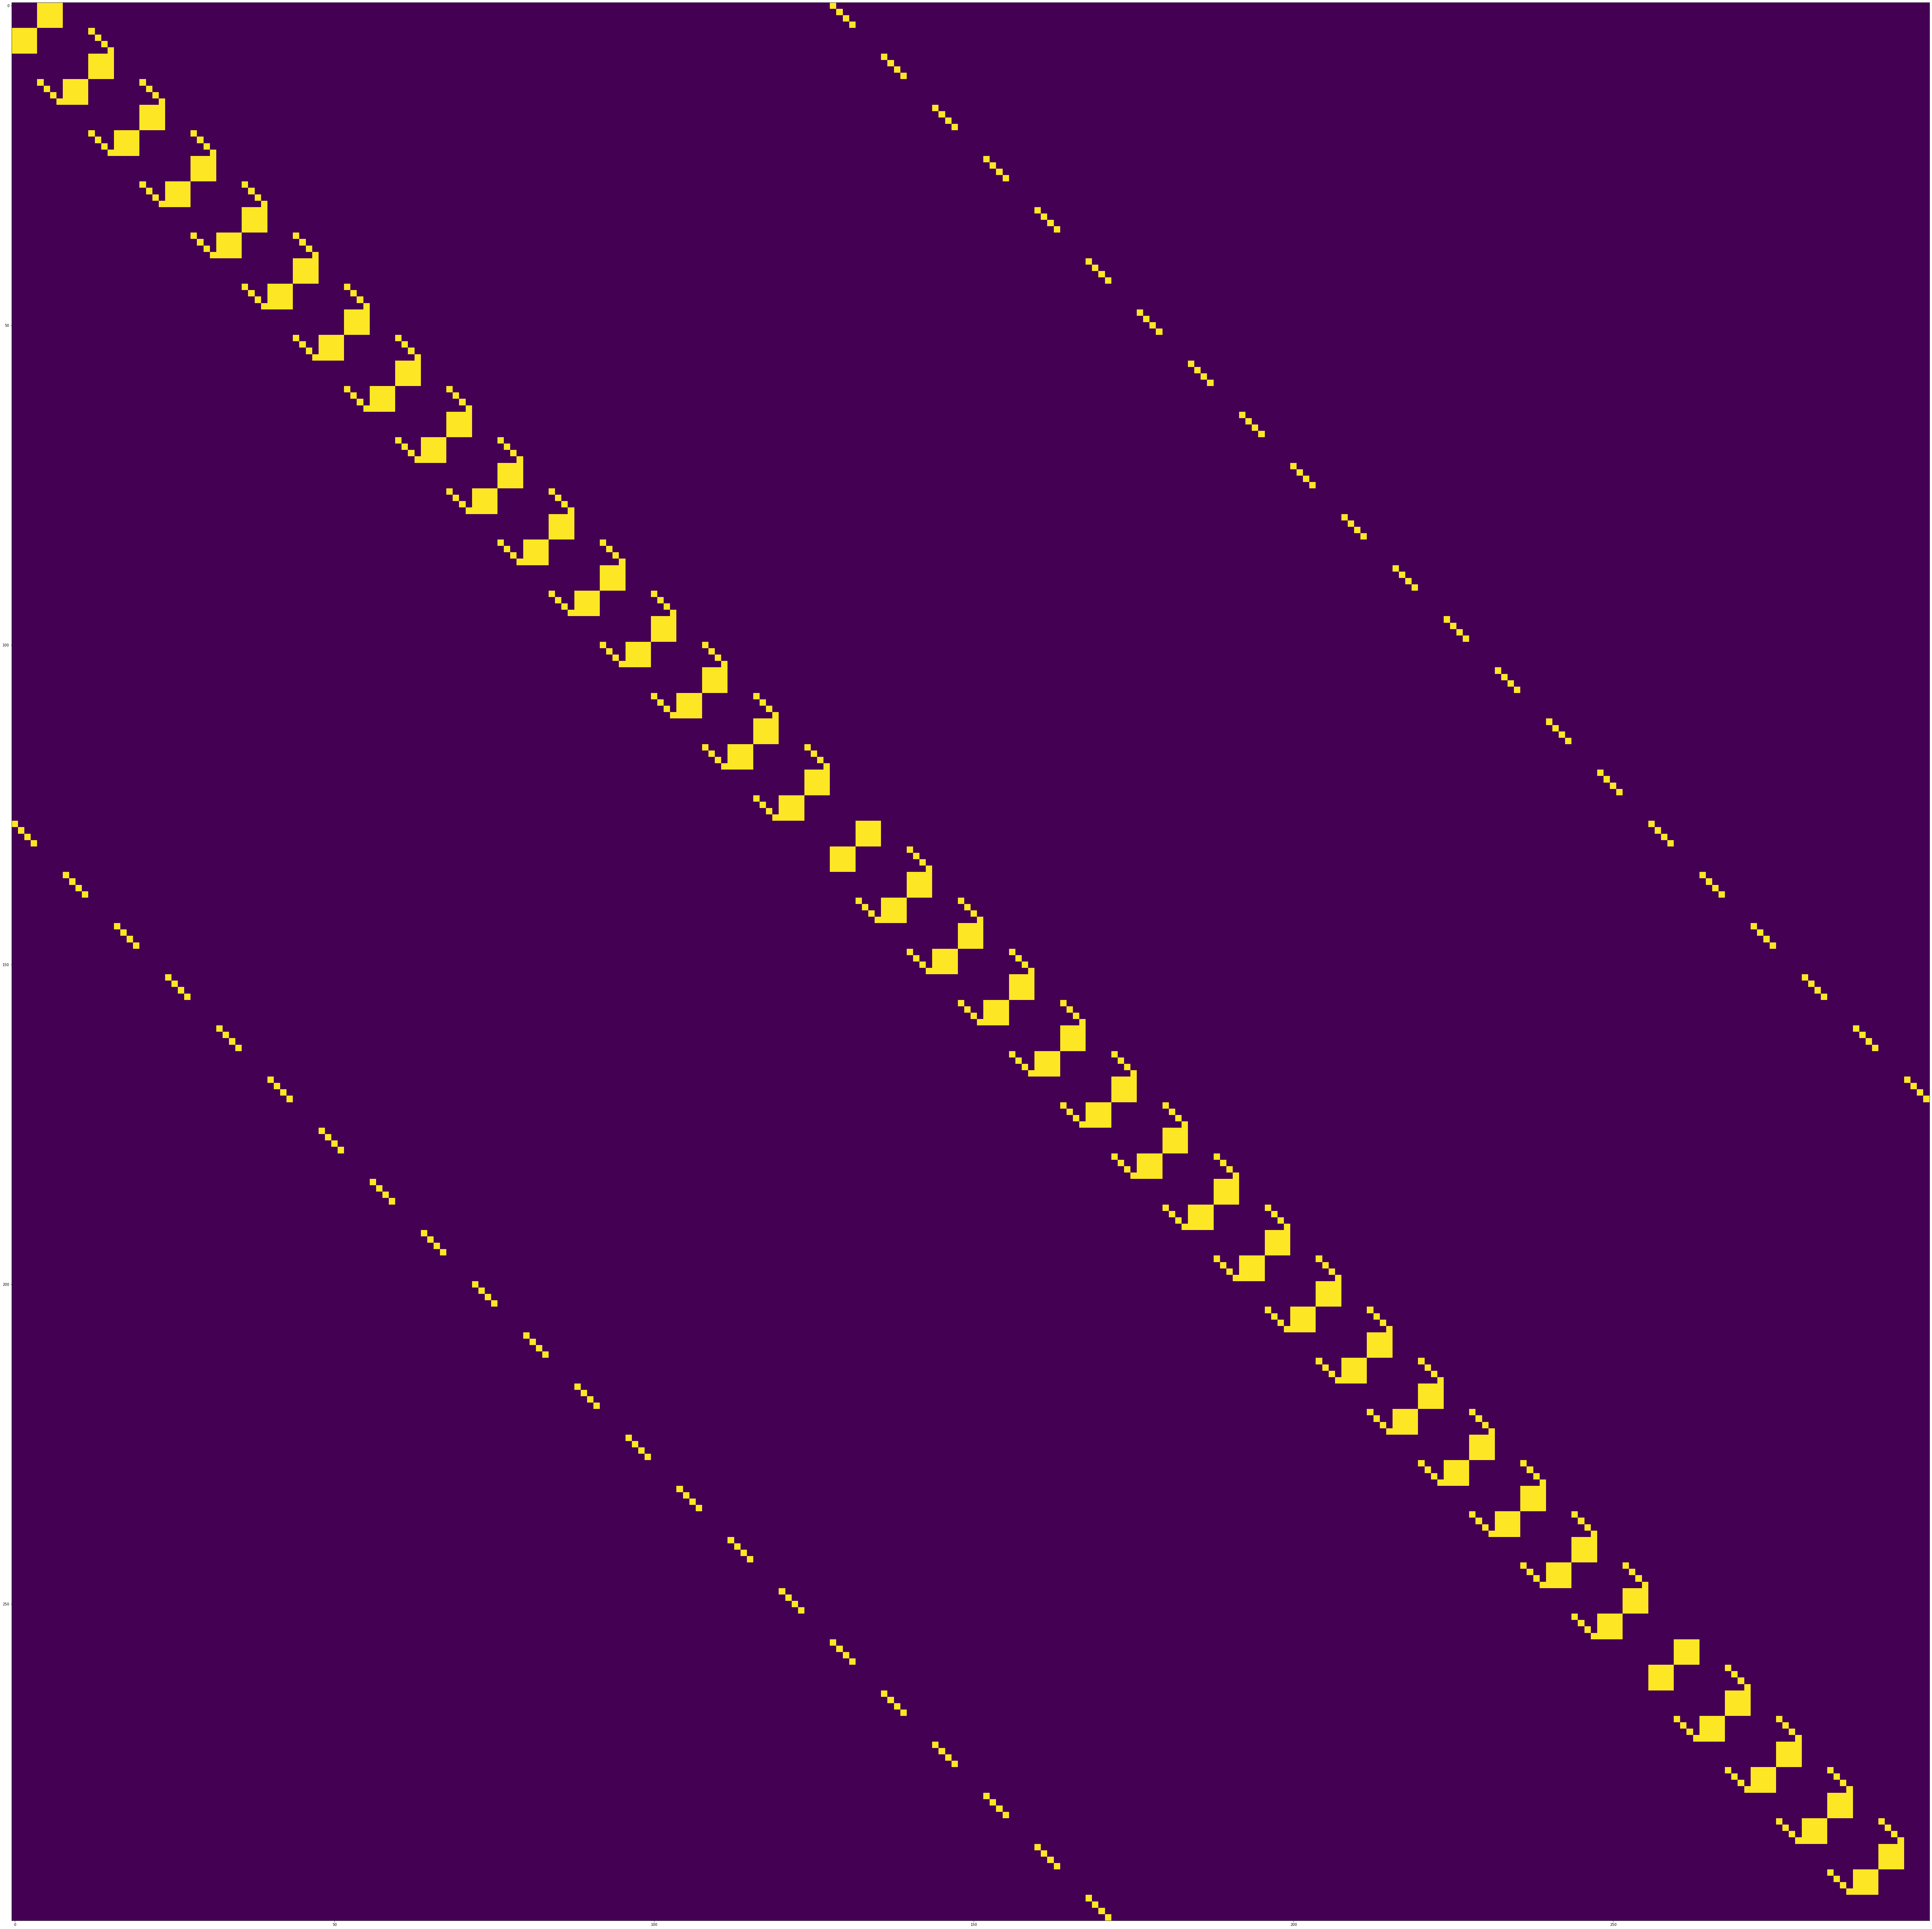

In [28]:
plt.figure(figsize=(100,100))
plt.imshow(A[:300,:300])

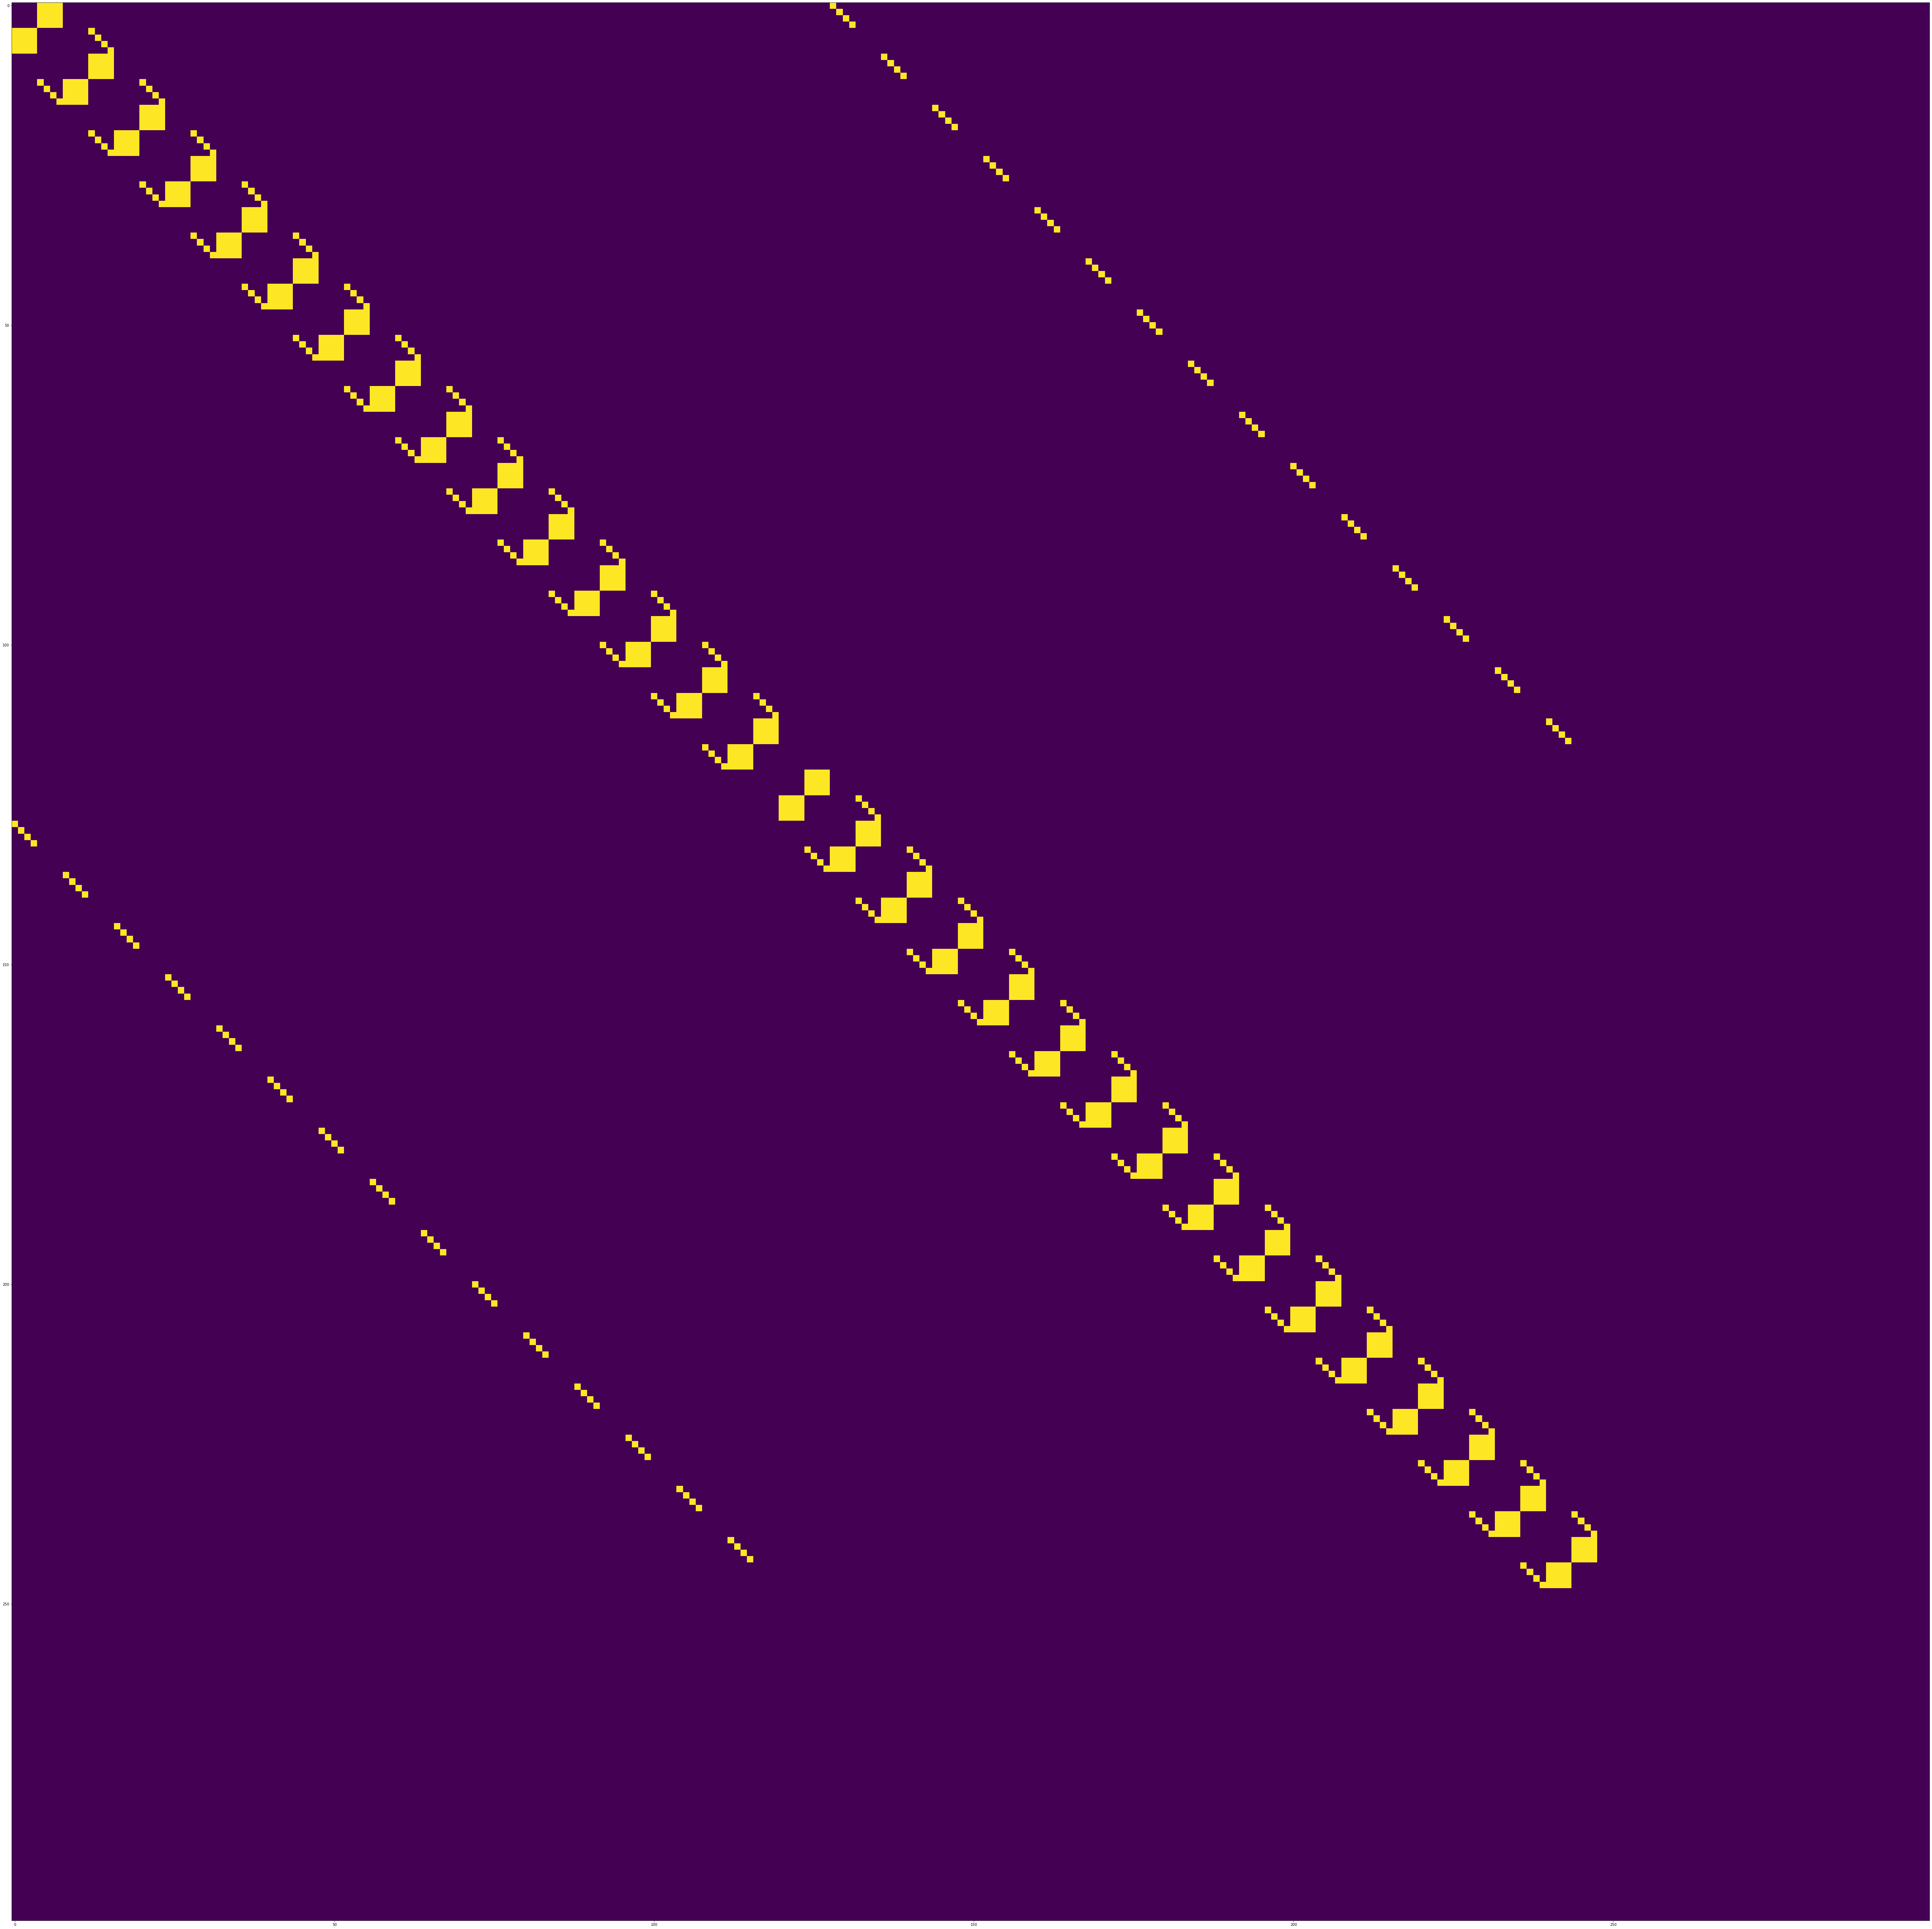

In [29]:
plt.figure(figsize=(100,100))
plt.imshow(A[-300:,-300:])

In [24]:
#G = nx.Graph()
#G.add_edges_from( solver.edges )